## Bil 470 Machine Learning
### Homework 2
#### Fatih Furkan HAS - 141101024

In [725]:
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np

Read data from file with pandas

In [726]:
data = pd.read_csv('wdbc.data')

Look the data's first 5 rows

In [727]:
data.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


Our dataset does not have header but pandas readed first row as header, we can change this with ignoring header, then look the first 5 rows of data again

In [728]:
data = pd.read_csv('wdbc.data', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


There is a column that contains id of row, we can ignore this column.
After that 'B' and 'M' values can be replaced with 0 and 1 for easier processing.

In [729]:
data = data.drop(data.columns[[0]], axis=1)
data.replace('B', 0, inplace=True)
data.replace('M', 1, inplace=True)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Slice data as features and labels
If you look at the dataset you'll notice that it is not scaled well. For instance the "volatile acidity" and "citric acid" column have values between 0 and 1, while most of the rest of the columns have higher values. Therefore, before training the algorithm, we will need to scale our data down.

In [762]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [759]:
features = data.loc[:, 2:]
labels = data.loc[:, 1]

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

Split dataset as train and test

In [731]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

Check the dataset features and labels

In [732]:
features.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [733]:
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64

Define grid search for optimizing parameters of models. This method also prints best parameters of given model

In [734]:
def grid_search_model(model, X, Y, parameters, cv):
    CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=cv)
    CV_model.fit(X, Y)
    CV_model.cv_results_
    print("Best Score:", CV_model.best_score_," / Best parameters:", CV_model.best_params_)
    return CV_model

SVM is too sensitive to 2 values these are C value and gamma value. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. The other one is gamma value, if gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting. When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. These values needed to be optimized. Np.linspace creates a list that contains 10 values from 0.001 to 100. These values will be used for optimizing C and gamma values.

In [735]:
param_grid = {'C': np.linspace(0.001, 100, 10),
             'gamma': np.linspace(0.001, 100, 10)}

Learning curve is plot of error vs train set size. In this case, our error rate is accuracy.

In [736]:
def learning_curve_model(model, X, Y, cv, train_sizes):

    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Error")

    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes, scoring='accuracy')

    train_scores = 1 - train_scores
    test_scores  = 1 - test_scores
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
                     
    plt.legend(loc="best")
    return plt

In [737]:
kfold = KFold(n_splits=10, shuffle=True)
#kfold = 10
grid_search_svm = grid_search_model(SVC(), X_train, y_train, param_grid, 10)

Best Score: 0.9824175824175824  / Best parameters: {'C': 33.333999999999996, 'gamma': 0.001}


<module 'matplotlib.pyplot' from '/usr/lib/python3.7/site-packages/matplotlib/pyplot.py'>

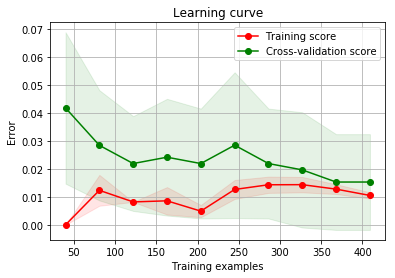

In [745]:
svc = SVC(C=grid_search_svm.best_params_['C'], gamma=grid_search_svm.best_params_['gamma'])
train_size=np.linspace(0.1,1, 10)
learning_curve_model(svc, X_train, y_train, kfold, train_size)

In [739]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [740]:
from sklearn.model_selection import RandomizedSearchCV
def random_search_model(model, X, Y, parameters, cv):
    RF_model = rand_search = RandomizedSearchCV(model, param_distributions=parameters, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017)
    RF_model.fit(X, Y)
    RF_model.cv_results_
    print("Best Score:", RF_model.best_score_," / Best parameters:", RF_model.best_params_)
    return RF_model

In [741]:
rf_search = random_search_model(SVC(), X_train, y_train, param_grid, 10)

Best Score: 0.9802197802197802  / Best parameters: {'gamma': 0.001, 'C': 100.0}


<module 'matplotlib.pyplot' from '/usr/lib/python3.7/site-packages/matplotlib/pyplot.py'>

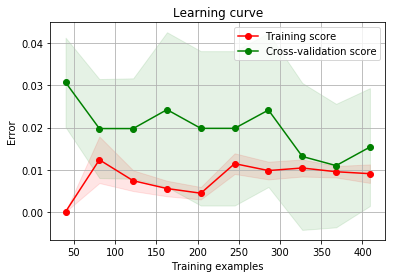

In [746]:
svc2 = SVC(C=rf_search.best_params_['C'], gamma=rf_search.best_params_['gamma'])
train_size=np.linspace(0.1,1, 10)
learning_curve_model(svc2, X_train, y_train, kfold, train_size)

In [743]:
svc2.fit(X_train, y_train)
y_pred2 = svc2.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.9473684210526315


In [751]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid_param = {  
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [752]:
from sklearn.ensemble import RandomForestClassifier

In [753]:
grid_search_random_forest = grid_search_model(RandomForestClassifier(), X_train, y_train, grid_param, 10)

/usr/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Score: 0.9626373626373627  / Best parameters: {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 500}


In [754]:
grid_search_random_forest.best_params_

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 500}

<module 'matplotlib.pyplot' from '/usr/lib/python3.7/site-packages/matplotlib/pyplot.py'>

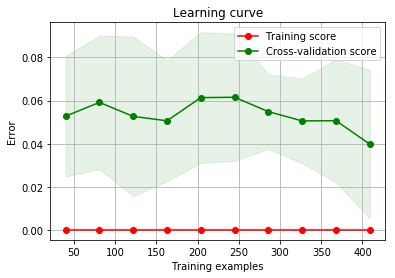

In [757]:
randomForest = RandomForestClassifier(bootstrap=False, n_estimators=500)
train_size=np.linspace(0.1,1, 10)
learning_curve_model(randomForest, X_train, y_train, 10, train_size)

In [758]:
randomForest.fit(X_train, y_train)
y_pred3 = randomForest.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.9473684210526315
